In [ ]:
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-the-Data" data-toc-modified-id="About-the-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About the Data</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assumptions</a></span><ul class="toc-item"><li><span><a href="#Something-something" data-toc-modified-id="Something-something-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Something something</a></span></li></ul></li></ul></li></ul></div>

In [3]:
## load libz
%run "../../Utilz/load_envz.ipynb"

DATA_DIR = "C:/Users/wairimu/Google Drive/xRepos/datasets"

sns.set_palette( "husl", 3)

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


# About the Data

**Questions**
- What facility or tier level is being addressed

In [3]:
## load dataset 
db_refs = pd.read_csv( "%s/KNBS_et_al/county-outpatient-morbidity-for-patients-below-5-years-of-age-in-2013.csv" % DATA_DIR )  
db_ills = pd.read_csv( "%s/KNBS_et_al/county-outpatient-morbidity-for-patients-below-5-years-of-age-in-2013-detailed.csv" % DATA_DIR )  


In [7]:
## Combined the datasets by columns into one << unit-County,
db = pd.merge( db_refs, db_ills, on="County", how="outer") 
db_refs.T.head(40)
db_ills.T.head(40)
db.T.head(40)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
County,Baringo,Bomet,Bungoma,Busia,Elgeyo-Marakwet,Embu,Garissa,Homa Bay,Isiolo,Kajiado,...,Siaya,Taita Taveta,Tana River,Tharaka Nithi,Trans-Nzoia,Turkana,Uasin Gishu,Vihiga,Wajir,West Pokot
First Attendances,143292,218177,267277,193484,134066,136903,107708,245671,44251,184611,...,230988,277664,53305,95228,108847,117546,192687,102068,89052,267179
Re-attendances,54052,40510,115292,127710,38640,90062,36967,93394,13968,101224,...,107120,55445,19822,43776,28995,35275,71045,30306,22125,41109
Referrals In,4170,306,3329,1725,2135,1397,396,2025,460,1529,...,2032,802,354,145,981,1187,5778,461,189,1369
Referrals Out,2327,702,2023,1391,2253,1098,321,2111,100,1263,...,2820,561,191,575,1095,1047,7631,1008,239,1329


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
County,Baringo,Bomet,Bungoma,Busia,Elgeyo-Marakwet,Embu,Garissa,Homa Bay,Isiolo,Kajiado,...,Siaya,Taita Taveta,Tana River,Tharaka Nithi,Trans-Nzoia,Turkana,Uasin Gishu,Vihiga,Wajir,West Pokot
"Accidents - Fractures, injuries,etc.",1876,1483,3310,1723,2753,1673,1335,1491,417,2868,...,1871,1608,537,965,1697,1168,3170,732,927,1069
All Others diseases,13945,51421,27558,22952,20383,48217,18665,22826,6415,35269,...,22601,16046,7018,17541,25412,8656,31558,7730,10188,8750
Aneamia,202,138,1861,2494,203,702,804,3264,393,971,...,3331,346,417,329,405,1175,637,544,728,321
Bilharzia,25,6,52,29,12,119,638,265,10,575,...,234,121,514,17,66,265,291,6,221,0
"Bites - Animal, Snake, etc",465,417,814,509,484,264,642,529,100,560,...,472,268,145,203,284,1243,894,137,588,195
Brucellosis,16,67,26,30,17,72,199,10,22,176,...,80,4,0,5,95,24,461,4,8,24
Burns,1586,1704,1797,1122,1561,1111,1019,1610,335,2062,...,1890,670,486,595,979,994,1661,850,1363,1101
Chicken Pox,864,1188,1404,499,745,1359,310,1031,91,1416,...,1051,930,636,317,1327,448,2384,530,412,272
Clinical Malaria,41281,28194,70734,78642,13761,14091,6513,119951,7050,23245,...,146013,12009,10812,36552,39103,51533,64073,56251,5957,50118


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
County,Baringo,Bomet,Bungoma,Busia,Elgeyo-Marakwet,Embu,Garissa,Homa Bay,Isiolo,Kajiado,...,Siaya,Taita Taveta,Tana River,Tharaka Nithi,Trans-Nzoia,Turkana,Uasin Gishu,Vihiga,Wajir,West Pokot
First Attendances,143292,218177,267277,193484,134066,136903,107708,245671,44251,184611,...,230988,277664,53305,95228,108847,117546,192687,102068,89052,267179
Re-attendances,54052,40510,115292,127710,38640,90062,36967,93394,13968,101224,...,107120,55445,19822,43776,28995,35275,71045,30306,22125,41109
Referrals In,4170,306,3329,1725,2135,1397,396,2025,460,1529,...,2032,802,354,145,981,1187,5778,461,189,1369
Referrals Out,2327,702,2023,1391,2253,1098,321,2111,100,1263,...,2820,561,191,575,1095,1047,7631,1008,239,1329
"Accidents - Fractures, injuries,etc.",1876,1483,3310,1723,2753,1673,1335,1491,417,2868,...,1871,1608,537,965,1697,1168,3170,732,927,1069
All Others diseases,13945,51421,27558,22952,20383,48217,18665,22826,6415,35269,...,22601,16046,7018,17541,25412,8656,31558,7730,10188,8750
Aneamia,202,138,1861,2494,203,702,804,3264,393,971,...,3331,346,417,329,405,1175,637,544,728,321
Bilharzia,25,6,52,29,12,119,638,265,10,575,...,234,121,514,17,66,265,291,6,221,0
"Bites - Animal, Snake, etc",465,417,814,509,484,264,642,529,100,560,...,472,268,145,203,284,1243,894,137,588,195


# Exploring the data
- Missing values
- Outliers 


In [8]:
## Check missing values
checkMissing( db )

('\nShape # records, # variables',
 (47, 37),
 '\n\n\n Counts of Missing Values \n',
 County                                  0
 First Attendances                       0
 Re-attendances                          0
 Referrals In                            0
 Referrals Out                           0
 Accidents - Fractures, injuries,etc.    0
 All Others diseases                     0
 Aneamia                                 0
 Bilharzia                               0
 Bites - Animal, Snake, etc              0
 Brucellosis                             0
 Burns                                   0
 Chicken Pox                             0
 Clinical Malaria                        0
 Confirmed Malaria                       0
 Congenital Anomalies                    0
 Dental Disorders                        0
 Diabetes                                0
 Diarrhoea                               0
 Dis. of the skin (incl. wounds)         0
 Dysentery                               0
 Ear Infecti

In [43]:
## Define and compute key variables 
#argz_EPM = ["First Attendances", "Re-attendances", "Referrals In", "Referrals Out", 
argz_EPM = ["Accidents - Fractures, injuries,etc.", "All Others diseases",
           "Confirmed Malaria", "Malnutrition", "Pneumonia", "Aneamia", "Diarrhoea", "Measles", "Intestinal worms",
           "Other Dis. of Respiratory System", "Tuberculosis", "Typhoid fever", "Urinary Tract Infection"]

argz_refs = ["First Attendances", "Re-attendances", "Referrals In", "Referrals Out", ]

## Assumptions
- Proxies
    - Hygine & preventative practices = UTI, Worms 
    - 

In [44]:
db[argz_EPM+argz_refs].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
"Accidents - Fractures, injuries,etc.",47.0,2475.68,1902.47,351.0,1377.5,1849.0,3217.0,10453.0
All Others diseases,47.0,34752.49,29451.84,6415.0,17270.5,26608.0,44336.5,172246.0
Confirmed Malaria,47.0,23371.06,32717.34,412.0,3594.0,9349.0,25908.0,135282.0
Malnutrition,47.0,1114.17,1136.56,137.0,341.5,854.0,1413.5,5480.0
Pneumonia,47.0,11683.28,7695.29,2553.0,6193.5,9724.0,15520.0,42924.0
Aneamia,47.0,1078.94,1030.00,138.0,394.0,637.0,1586.5,4394.0
Diarrhoea,47.0,25795.72,17205.99,6943.0,12816.5,23243.0,32880.0,105659.0
Measles,47.0,220.36,335.05,0.0,43.5,95.0,182.5,1578.0
Intestinal worms,47.0,7439.23,6548.56,723.0,3187.0,4987.0,9557.5,33149.0
Other Dis. of Respiratory System,47.0,119014.62,78008.39,24163.0,64607.5,106683.0,158770.0,427147.0


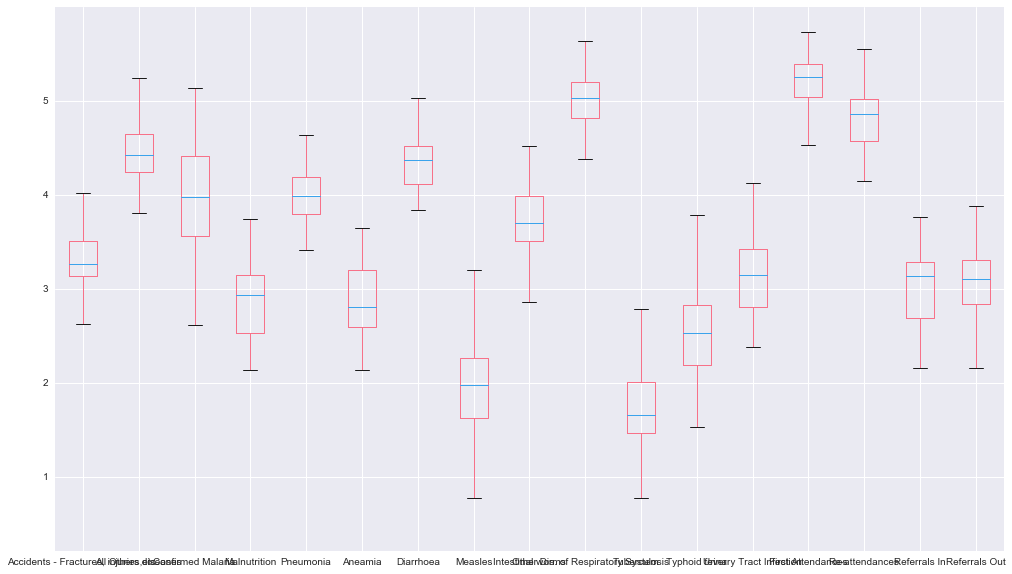

In [46]:
## plot distributions -- using boxplots on normalized
#np.log10( db[argz_EPM] ).describe().round(2).T
np.log10( db[argz_EPM+argz_refs] ).plot( kind="box", figsize=(17,10))

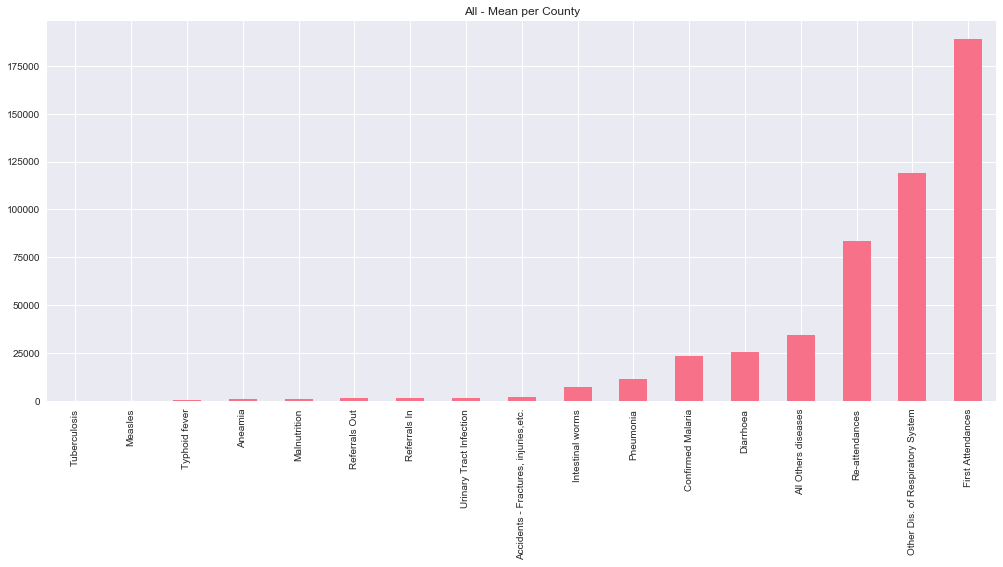

In [48]:
db[argz_EPM+argz_refs].mean().sort_values().plot(kind="bar", figsize=(17,7), title="All - Mean per County")

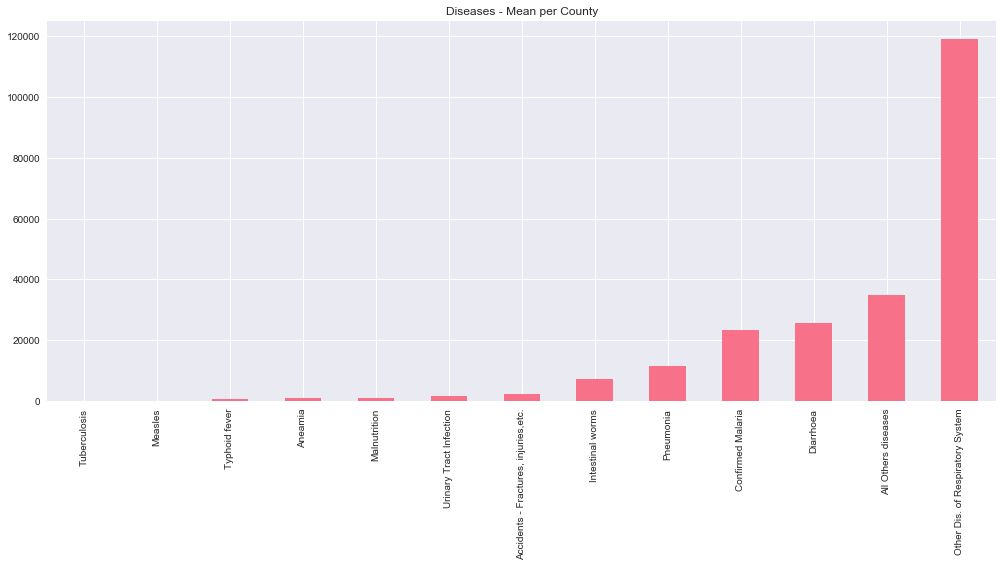

In [49]:
db[argz_EPM].mean().sort_values().plot(kind="bar", figsize=(17,7), title="Diseases - Mean per County")

,"Accidents - Fractures, injuries,etc.",All Others diseases,Confirmed Malaria,Malnutrition,Pneumonia,Aneamia,Diarrhoea,Measles,Intestinal worms,Other Dis. of Respiratory System,Tuberculosis,Typhoid fever,Urinary Tract Infection,First Attendances,Re-attendances,Referrals In,Referrals Out
"Accidents - Fractures, injuries,etc.",1.000,0.878,0.186,0.394,0.767,0.476,0.873,0.448,0.654,0.935,0.761,0.649,0.786,0.859,0.915,0.782,0.736
All Others diseases,0.878,1.000,0.033,0.388,0.734,0.483,0.830,0.369,0.614,0.923,0.751,0.628,0.787,0.759,0.878,0.715,0.645
Confirmed Malaria,0.186,0.033,1.000,0.228,0.315,0.600,0.283,0.223,0.122,0.171,0.189,0.289,0.277,0.371,0.352,0.204,0.271
Malnutrition,0.394,0.388,0.228,1.000,0.558,0.612,0.530,0.339,0.160,0.333,0.619,0.533,0.660,0.341,0.464,0.456,0.308
Pneumonia,0.767,0.734,0.315,0.558,1.000,0.572,0.758,0.474,0.460,0.738,0.660,0.640,0.812,0.669,0.817,0.697,0.624
Aneamia,0.476,0.483,0.600,0.612,0.572,1.000,0.701,0.311,0.171,0.489,0.617,0.621,0.695,0.545,0.685,0.493,0.511
Diarrhoea,0.873,0.830,0.283,0.530,0.758,0.701,1.000,0.417,0.463,0.887,0.793,0.738,0.840,0.833,0.900,0.759,0.691
Measles,0.448,0.369,0.223,0.339,0.474,0.311,0.417,1.000,0.491,0.345,0.462,0.443,0.491,0.428,0.352,0.463,0.317
Intestinal worms,0.654,0.614,0.122,0.160,0.460,0.171,0.463,0.491,1.000,0.665,0.380,0.186,0.501,0.530,0.573,0.393,0.296
Other Dis. of Respiratory System,0.935,0.923,0.171,0.333,0.738,0.489,0.887,0.345,0.665,1.000,0.698,0.569,0.740,0.859,0.934,0.709,0.697


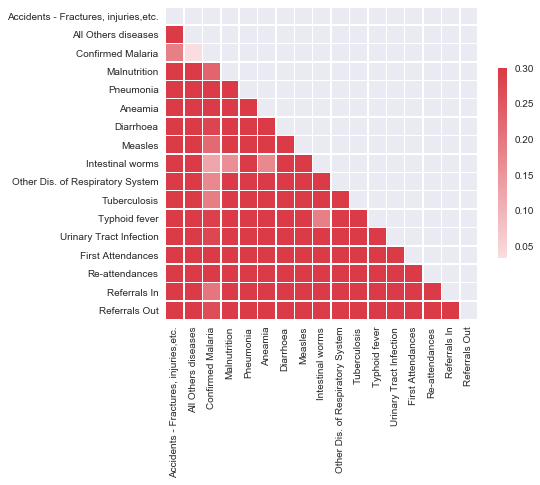

In [50]:
## correlations 
t,g = plotCorrz( corrz(db, argz_EPM+argz_refs))
t

,"Accidents - Fractures, injuries,etc.",All Others diseases,Confirmed Malaria,Malnutrition,Pneumonia,Aneamia,Diarrhoea,Measles,Intestinal worms,Other Dis. of Respiratory System,Tuberculosis,Typhoid fever,Urinary Tract Infection
"Accidents - Fractures, injuries,etc.",1.000,0.878,0.186,0.394,0.767,0.476,0.873,0.448,0.654,0.935,0.761,0.649,0.786
All Others diseases,0.878,1.000,0.033,0.388,0.734,0.483,0.830,0.369,0.614,0.923,0.751,0.628,0.787
Confirmed Malaria,0.186,0.033,1.000,0.228,0.315,0.600,0.283,0.223,0.122,0.171,0.189,0.289,0.277
Malnutrition,0.394,0.388,0.228,1.000,0.558,0.612,0.530,0.339,0.160,0.333,0.619,0.533,0.660
Pneumonia,0.767,0.734,0.315,0.558,1.000,0.572,0.758,0.474,0.460,0.738,0.660,0.640,0.812
Aneamia,0.476,0.483,0.600,0.612,0.572,1.000,0.701,0.311,0.171,0.489,0.617,0.621,0.695
Diarrhoea,0.873,0.830,0.283,0.530,0.758,0.701,1.000,0.417,0.463,0.887,0.793,0.738,0.840
Measles,0.448,0.369,0.223,0.339,0.474,0.311,0.417,1.000,0.491,0.345,0.462,0.443,0.491
Intestinal worms,0.654,0.614,0.122,0.160,0.460,0.171,0.463,0.491,1.000,0.665,0.380,0.186,0.501
Other Dis. of Respiratory System,0.935,0.923,0.171,0.333,0.738,0.489,0.887,0.345,0.665,1.000,0.698,0.569,0.740


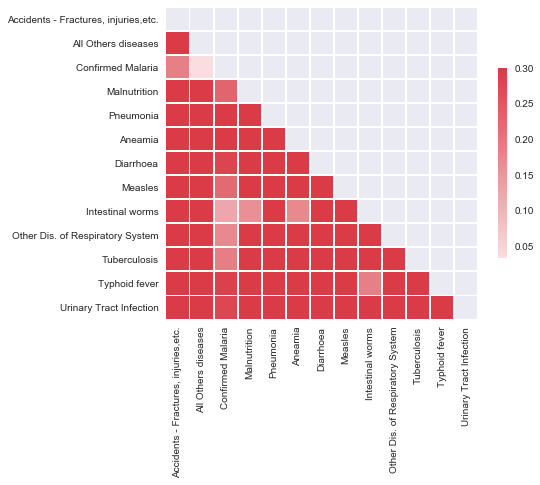

In [51]:
t,g = plotCorrz( corrz(db, argz_EPM))
t

In [55]:
## Key indicators - hygine, sanitation, cold/harsh weather, accidents/random, immunization, 
argz_model = ["Intestinal worms", "Typhoid fever", "Measles", "Confirmed Malaria", "Malnutrition", "Pneumonia", "Diarrhoea", "Aneamia"]

### Something something 
- Referral activity correlates most with: Typhoid fever, pneumonia and diarrhoea 
- Intenstinal worms correlate strongest with Measles, Pneumonia and Diarrhoea
    - May be worms are discovered during a referral activity for these diseases. Intenstinal worms are # 6 popular disease.
        - May be they are not diagnozed and treated early at the community and get discovered when severe/late 
        - May be get discovered alongisde other problems 
- Diarrhoea has high associations with typhoid fever and pneumonia - it is a known symptom for those diseases. 
    - Also correlates reseanably with intestinal worms and malnutrition. 
    - **Could diarrhoea (and something else) be used to explore for pneumonia, typhod fever, worms and malnutrition? << Find out from the medic material 
        - in the case of worms, why and how to do it earlier?**
        - Malnutrition and worms are lowly correlated
- Aneamia has association with most of the diseases - is it a symptom or is it a negative consequence that gets heigtened and discovred later when a disease is severe
    - 

,Intestinal worms,Typhoid fever,Measles,Confirmed Malaria,Malnutrition,Pneumonia,Diarrhoea,Aneamia
Intestinal worms,1.000,0.186,0.491,0.122,0.160,0.460,0.463,0.171
Typhoid fever,0.186,1.000,0.443,0.289,0.533,0.640,0.738,0.621
Measles,0.491,0.443,1.000,0.223,0.339,0.474,0.417,0.311
Confirmed Malaria,0.122,0.289,0.223,1.000,0.228,0.315,0.283,0.600
Malnutrition,0.160,0.533,0.339,0.228,1.000,0.558,0.530,0.612
Pneumonia,0.460,0.640,0.474,0.315,0.558,1.000,0.758,0.572
Diarrhoea,0.463,0.738,0.417,0.283,0.530,0.758,1.000,0.701
Aneamia,0.171,0.621,0.311,0.600,0.612,0.572,0.701,1.000


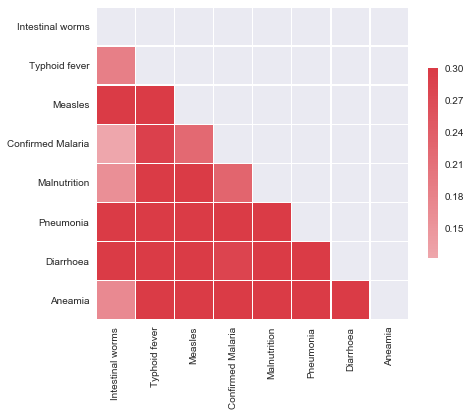

In [56]:
t,g = plotCorrz( corrz(db, argz_model))
t

,Intestinal worms,Typhoid fever,Measles,Confirmed Malaria,Malnutrition,Pneumonia,Diarrhoea,Aneamia,First Attendances,Re-attendances,Referrals In,Referrals Out
Intestinal worms,1.000,0.186,0.491,0.122,0.160,0.460,0.463,0.171,0.530,0.573,0.393,0.296
Typhoid fever,0.186,1.000,0.443,0.289,0.533,0.640,0.738,0.621,0.637,0.653,0.840,0.699
Measles,0.491,0.443,1.000,0.223,0.339,0.474,0.417,0.311,0.428,0.352,0.463,0.317
Confirmed Malaria,0.122,0.289,0.223,1.000,0.228,0.315,0.283,0.600,0.371,0.352,0.204,0.271
Malnutrition,0.160,0.533,0.339,0.228,1.000,0.558,0.530,0.612,0.341,0.464,0.456,0.308
Pneumonia,0.460,0.640,0.474,0.315,0.558,1.000,0.758,0.572,0.669,0.817,0.697,0.624
Diarrhoea,0.463,0.738,0.417,0.283,0.530,0.758,1.000,0.701,0.833,0.900,0.759,0.691
Aneamia,0.171,0.621,0.311,0.600,0.612,0.572,0.701,1.000,0.545,0.685,0.493,0.511
First Attendances,0.530,0.637,0.428,0.371,0.341,0.669,0.833,0.545,1.000,0.869,0.669,0.681
Re-attendances,0.573,0.653,0.352,0.352,0.464,0.817,0.900,0.685,0.869,1.000,0.720,0.708


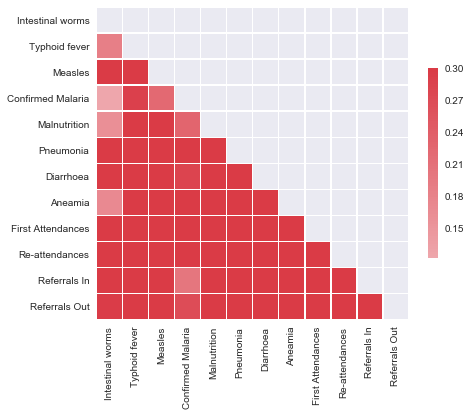

In [57]:
t,g = plotCorrz( corrz(db, argz_model+argz_refs))
t

In [4]:
%load_ext rpy2.ipython 
%R require(ggplot2); require(tidyr); require(dplyr) 


array([1], dtype=int32)

In [5]:
%%R -i db

db.describe()

NameError: name 'db' is not defined